In [1]:
import keras
import numpy as np
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Flatten,Input,Multiply
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from skimage import util
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.models import Model

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_noise_train = np.zeros((50000,32, 32, 3), dtype=np.float) #x_train.shape=(50000,32,32,3)
x_noise_test = np.zeros((10000,32, 32, 3), dtype=np.float) #x_test.shape =(10000,32,32,3)
epochs=200

In [4]:
for i in range(len(x_train)):
    x_noise_train[i] = util.random_noise(x_train[i],mode='speckle')
for i in range(len(x_test)):
    x_noise_test[i] = util.random_noise(x_test[i],mode='speckle')

In [5]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
inputs = Input(shape=(32,32,3))
x = Conv2D(8, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
no_noise_cnn_model=Model(inputs=inputs,outputs = x)

In [8]:
no_noise_cnn_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),
              metrics=['accuracy'])

In [9]:
no_noise_cnn_model_history=no_noise_cnn_model.fit(x_train,y_train,batch_size=64,epochs=epochs,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 15s 303us/step - loss: 2.2635 - acc: 0.1649 - val_loss: 2.1596 - val_acc: 0.2477
Epoch 2/200
50000/50000 [==============================] - 11s 225us/step - loss: 2.0057 - acc: 0.2722 - val_loss: 1.9026 - val_acc: 0.3214
Epoch 3/200
50000/50000 [==============================] - 12s 231us/step - loss: 1.8479 - acc: 0.3292 - val_loss: 1.7727 - val_acc: 0.3589
Epoch 4/200
50000/50000 [==============================] - 11s 225us/step - loss: 1.7199 - acc: 0.3750 - val_loss: 1.6665 - val_acc: 0.4061
Epoch 5/200
50000/50000 [==============================] - 11s 227us/step - loss: 1.6211 - acc: 0.4117 - val_loss: 1.5761 - val_acc: 0.4379
Epoch 6/200
50000/50000 [==============================] - 11s 228us/step - loss: 1.5556 - acc: 0.4384 - val_loss: 1.5234 - val_acc: 0.4558
Epoch 7/200
50000/50000 [==============================] - 11s

50000/50000 [==============================] - 11s 223us/step - loss: 0.4213 - acc: 0.8488 - val_loss: 1.4747 - val_acc: 0.6244
Epoch 115/200
50000/50000 [==============================] - 11s 224us/step - loss: 0.4162 - acc: 0.8510 - val_loss: 1.5176 - val_acc: 0.6195
Epoch 116/200
50000/50000 [==============================] - 11s 226us/step - loss: 0.4063 - acc: 0.8533 - val_loss: 1.5049 - val_acc: 0.6268
Epoch 117/200
50000/50000 [==============================] - 11s 226us/step - loss: 0.4002 - acc: 0.8575 - val_loss: 1.5468 - val_acc: 0.6264
Epoch 118/200
50000/50000 [==============================] - 11s 227us/step - loss: 0.4006 - acc: 0.8566 - val_loss: 1.5739 - val_acc: 0.6161
Epoch 119/200
50000/50000 [==============================] - 11s 226us/step - loss: 0.4046 - acc: 0.8553 - val_loss: 1.5940 - val_acc: 0.6200
Epoch 120/200
50000/50000 [==============================] - 11s 227us/step - loss: 0.3871 - acc: 0.8611 - val_loss: 1.6133 - val_acc: 0.6231
Epoch 121/200
50000/

Epoch 172/200
50000/50000 [==============================] - 11s 225us/step - loss: 0.1925 - acc: 0.9290 - val_loss: 2.4722 - val_acc: 0.6012
Epoch 173/200
50000/50000 [==============================] - 11s 225us/step - loss: 0.1974 - acc: 0.9279 - val_loss: 2.4840 - val_acc: 0.6054
Epoch 174/200
50000/50000 [==============================] - 11s 225us/step - loss: 0.1849 - acc: 0.9316 - val_loss: 2.5300 - val_acc: 0.6054
Epoch 175/200
50000/50000 [==============================] - 11s 228us/step - loss: 0.1816 - acc: 0.9339 - val_loss: 2.4957 - val_acc: 0.6065
Epoch 176/200
50000/50000 [==============================] - 12s 230us/step - loss: 0.2069 - acc: 0.9240 - val_loss: 2.5059 - val_acc: 0.6097
Epoch 177/200
50000/50000 [==============================] - 11s 229us/step - loss: 0.1971 - acc: 0.9274 - val_loss: 2.5801 - val_acc: 0.6079
Epoch 178/200
50000/50000 [==============================] - 11s 229us/step - loss: 0.1775 - acc: 0.9350 - val_loss: 2.5615 - val_acc: 0.6059
Epoch 

In [10]:
inputs = Input(shape=(32,32,3))
x = Conv2D(8, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [11]:
noise_cnn_model=Model(inputs=inputs,outputs = x)

In [12]:
noise_cnn_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),
              metrics=['accuracy'])

In [13]:
noise_cnn_model_history=noise_cnn_model.fit(x_noise_train,y_train,batch_size=64,epochs=epochs,validation_data=(x_noise_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 19s 382us/step - loss: 2.2484 - acc: 0.1560 - val_loss: 2.1034 - val_acc: 0.2489 3s - loss: 2.2704 - 
Epoch 2/200
50000/50000 [==============================] - 15s 301us/step - loss: 1.9701 - acc: 0.2751 - val_loss: 1.8784 - val_acc: 0.3105
Epoch 3/200
50000/50000 [==============================] - 14s 281us/step - loss: 1.8035 - acc: 0.3410 - val_loss: 1.9301 - val_acc: 0.3108
Epoch 4/200
50000/50000 [==============================] - 14s 281us/step - loss: 1.6975 - acc: 0.3837 - val_loss: 1.6805 - val_acc: 0.3905
Epoch 5/200
50000/50000 [==============================] - 14s 289us/step - loss: 1.6204 - acc: 0.4129 - val_loss: 1.6661 - val_acc: 0.4077
Epoch 6/200
50000/50000 [==============================] - 14s 282us/step - loss: 1.5609 - acc: 0.4343 - val_loss: 1.5329 - val_acc: 0.4425
Epoch 7/200
50000/50000 [==============================] - 14s 289us/step - loss: 1.5093 

50000/50000 [==============================] - 13s 253us/step - loss: 0.4720 - acc: 0.8299 - val_loss: 1.5336 - val_acc: 0.6105
Epoch 116/200
50000/50000 [==============================] - 14s 271us/step - loss: 0.4720 - acc: 0.8285 - val_loss: 1.5680 - val_acc: 0.6059
Epoch 117/200
50000/50000 [==============================] - 13s 255us/step - loss: 0.4592 - acc: 0.8359 - val_loss: 1.5986 - val_acc: 0.5985
Epoch 118/200
50000/50000 [==============================] - 13s 257us/step - loss: 0.4530 - acc: 0.8367 - val_loss: 1.5609 - val_acc: 0.6111
Epoch 119/200
50000/50000 [==============================] - 13s 256us/step - loss: 0.4475 - acc: 0.8395 - val_loss: 1.6077 - val_acc: 0.6063
Epoch 120/200
50000/50000 [==============================] - 13s 254us/step - loss: 0.4416 - acc: 0.8415 - val_loss: 1.6065 - val_acc: 0.6056
Epoch 121/200
50000/50000 [==============================] - 13s 258us/step - loss: 0.4356 - acc: 0.8432 - val_loss: 1.6336 - val_acc: 0.6041
Epoch 122/200
50000/

In [14]:
inputs = Input(shape=(32,32,3))
r1 = Conv2D(8, kernel_size=(3, 3), activation='relu')(inputs)
r2 = Conv2D(8, kernel_size=(3, 3), activation='relu')(inputs)
r = Multiply()([r1,r2])
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Conv2D(16, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [15]:
noise_rcnn1_model=Model(inputs=inputs,outputs = x)

In [16]:
noise_rcnn1_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),
              metrics=['accuracy'])

In [17]:
noise_rcnn1_model_history=noise_rcnn1_model.fit(x_noise_train,y_train,batch_size=64,epochs=epochs,validation_data=(x_noise_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 19s 385us/step - loss: 2.2915 - acc: 0.1322 - val_loss: 2.2496 - val_acc: 0.1882
Epoch 2/200
50000/50000 [==============================] - 18s 359us/step - loss: 2.0769 - acc: 0.2457 - val_loss: 1.8984 - val_acc: 0.3068
Epoch 3/200
50000/50000 [==============================] - 18s 361us/step - loss: 1.8315 - acc: 0.3354 - val_loss: 1.7534 - val_acc: 0.3673
Epoch 4/200
50000/50000 [==============================] - 18s 359us/step - loss: 1.7110 - acc: 0.3821 - val_loss: 1.6489 - val_acc: 0.4045
Epoch 5/200
50000/50000 [==============================] - 18s 356us/step - loss: 1.6282 - acc: 0.4148 - val_loss: 1.6015 - val_acc: 0.4276
Epoch 6/200
50000/50000 [==============================] - 18s 359us/step - loss: 1.5664 - acc: 0.4404 - val_loss: 1.5480 - val_acc: 0.4425
Epoch 7/200
50000/50000 [==============================] - 18s 356us/step - loss: 1.5167 - acc: 0.4577 - val_l

Epoch 59/200
50000/50000 [==============================] - 18s 361us/step - loss: 0.8111 - acc: 0.7130 - val_loss: 1.2686 - val_acc: 0.5866
Epoch 60/200
50000/50000 [==============================] - 18s 360us/step - loss: 0.7989 - acc: 0.7176 - val_loss: 1.2883 - val_acc: 0.5844
Epoch 61/200
50000/50000 [==============================] - 18s 357us/step - loss: 0.7947 - acc: 0.7181 - val_loss: 1.2553 - val_acc: 0.5902
Epoch 62/200
50000/50000 [==============================] - 18s 360us/step - loss: 0.7869 - acc: 0.7221 - val_loss: 1.3194 - val_acc: 0.5759
Epoch 63/200
50000/50000 [==============================] - 18s 359us/step - loss: 0.7810 - acc: 0.7233 - val_loss: 1.2751 - val_acc: 0.5985
Epoch 64/200
50000/50000 [==============================] - 18s 359us/step - loss: 0.7689 - acc: 0.7279 - val_loss: 1.3212 - val_acc: 0.5743
Epoch 65/200
50000/50000 [==============================] - 18s 359us/step - loss: 0.7643 - acc: 0.7283 - val_loss: 1.2974 - val_acc: 0.5855
Epoch 66/200


Epoch 117/200
50000/50000 [==============================] - 18s 361us/step - loss: 0.4371 - acc: 0.8403 - val_loss: 1.8923 - val_acc: 0.5654
Epoch 118/200
50000/50000 [==============================] - 18s 360us/step - loss: 0.4302 - acc: 0.8435 - val_loss: 1.9774 - val_acc: 0.5688
Epoch 119/200
50000/50000 [==============================] - 18s 358us/step - loss: 0.4253 - acc: 0.8458 - val_loss: 1.9956 - val_acc: 0.5630
Epoch 120/200
50000/50000 [==============================] - 18s 360us/step - loss: 0.4289 - acc: 0.8430 - val_loss: 1.9643 - val_acc: 0.5616
Epoch 121/200
50000/50000 [==============================] - 18s 362us/step - loss: 0.4219 - acc: 0.8460 - val_loss: 1.9840 - val_acc: 0.5643
Epoch 122/200
50000/50000 [==============================] - 18s 357us/step - loss: 0.4123 - acc: 0.8494 - val_loss: 2.0311 - val_acc: 0.5563
Epoch 123/200
50000/50000 [==============================] - 18s 358us/step - loss: 0.3983 - acc: 0.8567 - val_loss: 2.0156 - val_acc: 0.5671
Epoch 

In [18]:
inputs = Input(shape=(32,32,3))
x = Conv2D(8, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
r1 = Conv2D(16, kernel_size=(3, 3), activation='relu')(x)
r2 = Conv2D(16, kernel_size=(3, 3), activation='relu')(x)
r = Multiply()([r1,r2])
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [19]:
noise_rcnn2_model=Model(inputs=inputs,outputs = x)

In [20]:
noise_rcnn2_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),
              metrics=['accuracy'])

In [21]:
noise_rcnn2_model_history=noise_rcnn2_model.fit(x_noise_train,y_train,batch_size=64,epochs=epochs,validation_data=(x_noise_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 16s 317us/step - loss: 2.2795 - acc: 0.1304 - val_loss: 2.1704 - val_acc: 0.2028
Epoch 2/200
50000/50000 [==============================] - 15s 301us/step - loss: 1.9755 - acc: 0.2796 - val_loss: 1.8599 - val_acc: 0.3330
Epoch 3/200
50000/50000 [==============================] - 15s 302us/step - loss: 1.8050 - acc: 0.3495 - val_loss: 1.7580 - val_acc: 0.3719
Epoch 4/200
50000/50000 [==============================] - 15s 303us/step - loss: 1.7217 - acc: 0.3827 - val_loss: 1.6827 - val_acc: 0.4030
Epoch 5/200
50000/50000 [==============================] - 15s 301us/step - loss: 1.6538 - acc: 0.4074 - val_loss: 1.6187 - val_acc: 0.4212
Epoch 6/200
50000/50000 [==============================] - 15s 300us/step - loss: 1.6092 - acc: 0.4228 - val_loss: 1.6649 - val_acc: 0.4098
Epoch 7/200
50000/50000 [==============================] - 15s 302us/step - loss: 1.5742 - acc: 0.4345 - val_l

Epoch 59/200
50000/50000 [==============================] - 15s 305us/step - loss: 0.8086 - acc: 0.7161 - val_loss: 1.2588 - val_acc: 0.5956
Epoch 60/200
50000/50000 [==============================] - 15s 300us/step - loss: 0.8010 - acc: 0.7175 - val_loss: 1.2525 - val_acc: 0.6031
Epoch 61/200
50000/50000 [==============================] - 15s 304us/step - loss: 0.7896 - acc: 0.7213 - val_loss: 1.3208 - val_acc: 0.5830
Epoch 62/200
50000/50000 [==============================] - 15s 301us/step - loss: 0.7835 - acc: 0.7240 - val_loss: 1.2772 - val_acc: 0.5952
Epoch 63/200
50000/50000 [==============================] - 15s 302us/step - loss: 0.7760 - acc: 0.7258 - val_loss: 1.3319 - val_acc: 0.5858
Epoch 64/200
50000/50000 [==============================] - 15s 300us/step - loss: 0.7688 - acc: 0.7263 - val_loss: 1.2959 - val_acc: 0.5983
Epoch 65/200
50000/50000 [==============================] - 15s 301us/step - loss: 0.7596 - acc: 0.7296 - val_loss: 1.3460 - val_acc: 0.5864
Epoch 66/200


Epoch 117/200
50000/50000 [==============================] - 15s 307us/step - loss: 0.4429 - acc: 0.8384 - val_loss: 1.9413 - val_acc: 0.5664
Epoch 118/200
50000/50000 [==============================] - 15s 301us/step - loss: 0.4416 - acc: 0.8385 - val_loss: 1.9349 - val_acc: 0.5628
Epoch 119/200
50000/50000 [==============================] - 15s 303us/step - loss: 0.4291 - acc: 0.8449 - val_loss: 1.9713 - val_acc: 0.5669
Epoch 120/200
50000/50000 [==============================] - 15s 301us/step - loss: 0.4280 - acc: 0.8434 - val_loss: 1.9755 - val_acc: 0.5737
Epoch 121/200
50000/50000 [==============================] - 15s 305us/step - loss: 0.4255 - acc: 0.8457 - val_loss: 2.0281 - val_acc: 0.5631
Epoch 122/200
50000/50000 [==============================] - 15s 301us/step - loss: 0.4264 - acc: 0.8431 - val_loss: 1.9527 - val_acc: 0.5657
Epoch 123/200
50000/50000 [==============================] - 15s 302us/step - loss: 0.4106 - acc: 0.8501 - val_loss: 1.9981 - val_acc: 0.5694
Epoch 

Epoch 175/200
50000/50000 [==============================] - 15s 307us/step - loss: 0.2807 - acc: 0.8984 - val_loss: 2.6802 - val_acc: 0.5561
Epoch 176/200
50000/50000 [==============================] - 15s 301us/step - loss: 0.2732 - acc: 0.8993 - val_loss: 2.7431 - val_acc: 0.5505
Epoch 177/200
50000/50000 [==============================] - 15s 306us/step - loss: 0.2601 - acc: 0.9053 - val_loss: 2.8194 - val_acc: 0.5567
Epoch 178/200
50000/50000 [==============================] - 15s 301us/step - loss: 0.2711 - acc: 0.9021 - val_loss: 2.7992 - val_acc: 0.5539
Epoch 179/200
50000/50000 [==============================] - 15s 303us/step - loss: 0.2666 - acc: 0.9036 - val_loss: 2.7638 - val_acc: 0.5624
Epoch 180/200
50000/50000 [==============================] - 15s 303us/step - loss: 0.2657 - acc: 0.9014 - val_loss: 2.8452 - val_acc: 0.5581
Epoch 181/200
50000/50000 [==============================] - 15s 301us/step - loss: 0.2583 - acc: 0.9045 - val_loss: 2.8868 - val_acc: 0.5555
Epoch 

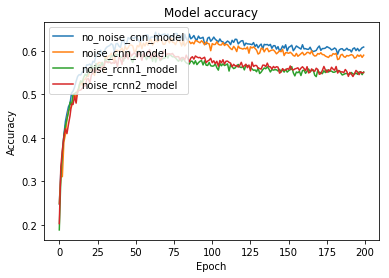

In [22]:
import matplotlib.pyplot as plt
plt.plot(no_noise_cnn_model_history.history['val_acc'])
plt.plot(noise_cnn_model_history.history['val_acc'])
plt.plot(noise_rcnn1_model_history.history['val_acc'])
plt.plot(noise_rcnn2_model_history.history['val_acc'])
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['no_noise_cnn_model', 'noise_cnn_model','noise_rcnn1_model','noise_rcnn2_model'], loc='lower right')
plt.show()

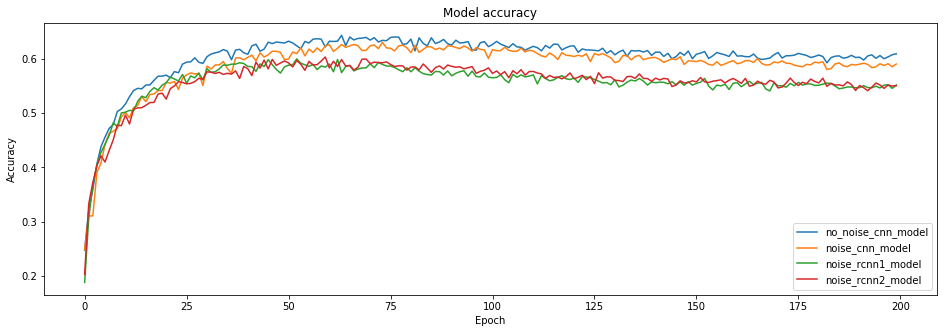

In [25]:
plt.plot(no_noise_cnn_model_history.history['val_acc'])
plt.plot(noise_cnn_model_history.history['val_acc'])
plt.plot(noise_rcnn1_model_history.history['val_acc'])
plt.plot(noise_rcnn2_model_history.history['val_acc'])
plt.rcParams['figure.figsize'] = (16.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['no_noise_cnn_model', 'noise_cnn_model','noise_rcnn1_model','noise_rcnn2_model'], loc='lower right')
plt.show()